<a href="https://colab.research.google.com/github/nurfnick/Data_Viz/blob/main/Content/Solutions/NFLPlayersHvW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cleaning Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from mpl_toolkits.axes_grid1 import make_axes_locatable

df = pd.read_csv("https://raw.githubusercontent.com/nurfnick/Data_Viz/main/Data_Sets/players.csv")

df.head()

,Player,Pos,Team,Num,Height,Weight,DOB
0,"Abanikanda, Israel",RB,NYJ,25,"5'11""",215 lbs,10/5/02
1,"Abdullah, Ameer",RB,LV,22,"5'9""",203 lbs,6/13/93
2,"Abdullah, Yasir",LB,JAC,56,"6'1""",234 lbs,4/12/00
3,"Abernathy, Micah",S,ATL,29,"6'0""",196 lbs,2/10/97
4,"Abram, Johnathan",S,NO,24,"6'0""",205 lbs,10/25/96


In [ ]:
i = 1

In [ ]:
def getRidOflbs(string):
  return string[:-3]+" "

df.Weight = df.Weight.apply(getRidOflbs)


In [ ]:
import re
l  = re.findall(r'\d+',df.Height[i])

In [ ]:
w = re.findall(r'\d+',df.Weight[i])

In [ ]:
int(w[0])

203

In [ ]:
int(l[0])*12 +int(l[1])

69

In [ ]:
def f(strring):
  l = re.findall(r'\d+',strring)
  return int(l[0])*12 +int(l[1])

df["Weight"] = df["Weight"].astype(str).astype(int)

f(df.Height[i])


69

In [ ]:
df.Height = df.Height.apply(lambda x:f(x))

# Work

https://matplotlib.org/stable/gallery/axes_grid1/scatter_hist_locatable_axes.html#sphx-glr-gallery-axes-grid1-scatter-hist-locatable-axes-py

In [ ]:
df.head()

,Player,Pos,Team,Num,Height,Weight,DOB
0,"Abanikanda, Israel",RB,NYJ,25,71,215,10/5/02
1,"Abdullah, Ameer",RB,LV,22,69,203,6/13/93
2,"Abdullah, Yasir",LB,JAC,56,73,234,4/12/00
3,"Abernathy, Micah",S,ATL,29,72,196,2/10/97
4,"Abram, Johnathan",S,NO,24,72,205,10/25/96


In [ ]:
np.random.normal(0, 0.3, len(df.Height))

array([ 0.19247815,  0.16965584,  0.04367449, ..., -0.14644234,
        0.04896241, -0.11374359])

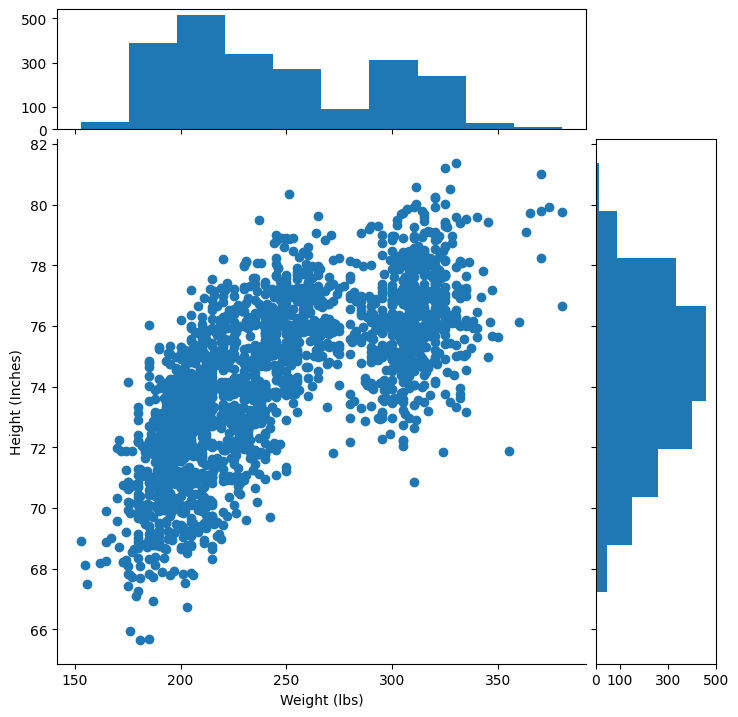

In [ ]:
x = df.Weight
y = df.Height + np.random.normal(0, 0.3, len(df.Height))

fig, ax = plt.subplots(figsize=(8.5,8.5))

ax.scatter(x,y)
sns.despine()
ax.set_ylabel("Height (Inches)")
ax.set_xlabel("Weight (lbs)")

divider = make_axes_locatable(ax)

ax_histx = divider.append_axes("top", 1.2, pad=0.1, sharex=ax)
ax_histy = divider.append_axes("right", 1.2, pad=0.1, sharey=ax)


ax_histx.xaxis.set_tick_params(labelbottom=False)
ax_histy.yaxis.set_tick_params(labelleft=False)

ax_histx.hist(x)
ax_histy.hist(y, orientation='horizontal')

ax_histx.set_yticks([0, 100, 300, 500])
ax_histy.set_xticks([0, 100, 300, 500])

plt.show()

In [ ]:
df.Pos.unique()

array(['RB', 'LB', 'S', 'WR', 'DT', 'LS', 'CB', 'OT', 'TE', 'DE', 'OL',
       'G', 'QB', 'DL', 'DB', 'C', 'P', 'K', 'FB', 'HB', 'NT'],
      dtype=object)

In [ ]:
import matplotlib.colors as mcolors
dict_color = {'RB': 'tab:orange', 'LB': 'b', 'S': 'lightskyblue', 'WR': 'wheat', 'DT': 'paleturquoise', 'LS': 'pink', 'CB': 'lightskyblue', 'OT': 'tab:brown', 'TE': 'tab:brown', 'DE': 'royalblue', 'OL': 'b',
       'G': 'tab:brown', 'QB': 'r', 'DL': 'paleturquoise', 'DB': 'lightskyblue', 'C': 'pink', 'P': 'mediumpurple', 'K': 'darkviolet', 'FB': 'tab:orange', 'HB': 'tab:orange', 'NT': 'paleturquoise'}

In [ ]:
df["color"] = df.Pos.apply(lambda x:dict_color.get(x))
df

,Player,Pos,Team,Num,Height,Weight,DOB,color
0,"Abanikanda, Israel",RB,NYJ,25,71,215,10/5/02,tab:orange
1,"Abdullah, Ameer",RB,LV,22,69,203,6/13/93,tab:orange
2,"Abdullah, Yasir",LB,JAC,56,73,234,4/12/00,b
3,"Abernathy, Micah",S,ATL,29,72,196,2/10/97,lightskyblue
4,"Abram, Johnathan",S,NO,24,72,205,10/25/96,lightskyblue
...,...,...,...,...,...,...,...,...
2216,"Zeitler, Kevin",G,DET,-,76,340,3/8/90,tab:brown
2217,"Zentner, Ty",P,TEN,13,74,200,6/7/98,mediumpurple
2218,"Zierer, Kilian",OT,HOU,66,79,312,2/24/98,tab:brown
2219,"Zuerlein, Greg",K,NYJ,9,72,187,12/27/87,darkviolet


In [ ]:
label = ['RB', 'LB', 'S', 'WR', 'DT', 'LS', 'CB', 'OT', 'TE', 'DE', 'OL','G', 'QB', 'DL', 'DB', 'C', 'P', 'K', 'FB', 'HB', 'NT']
handle = [dict_color.get(x) for x in label]

In [ ]:

import matplotlib.patches as mpatches

lst = []

for i in label:
  lst.append(mpatches.Patch(color=dict_color.get(i), label=i))


#plt.legend(handles=[red_patch1,red_patch2,red_patch3,red_patch4,red_patch5],loc='upper right', bbox_to_anchor=(-0.005, 1))
lst

In [ ]:
handle

['tab:orange',
 'b',
 'lightskyblue',
 'wheat',
 'paleturquoise',
 'pink',
 'lightskyblue',
 'tab:brown',
 'tab:brown',
 'royalblue',
 'b',
 'tab:brown',
 'r',
 'paleturquoise',
 'lightskyblue',
 'pink',
 'mediumpurple',
 'darkviolet',
 'tab:orange',
 'tab:orange',
 'paleturquoise']

AttributeError: PathCollection.set() got an unexpected keyword argument 'text'

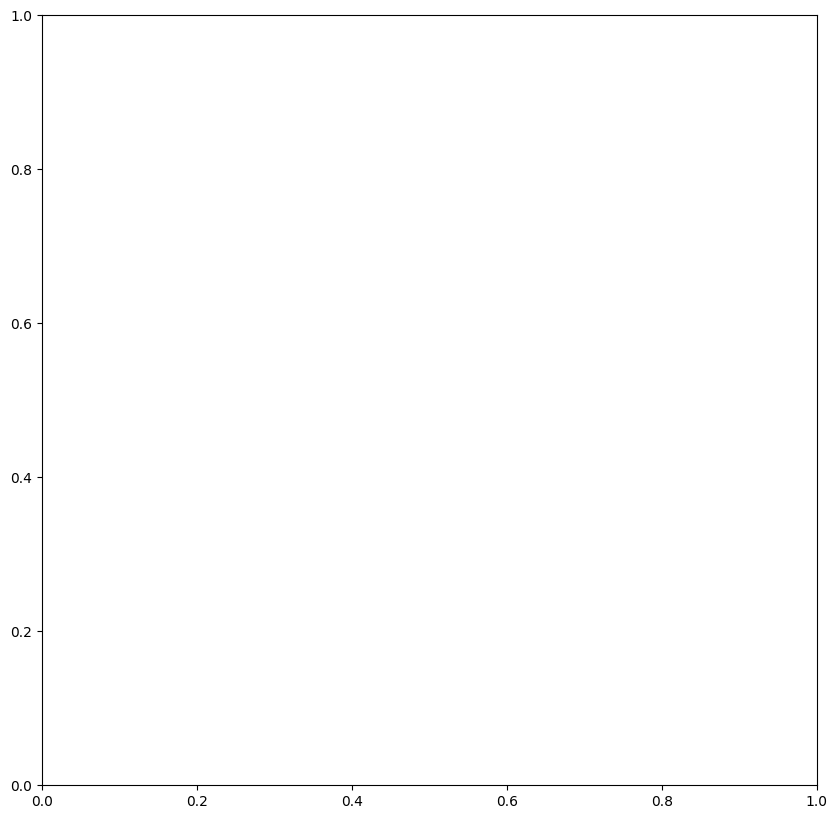

<Figure size 1000x600 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))


plt.figure(figsize=(10, 6))
#color_map = [color for color in df.Pos()[:len(x)]]

ax.scatter(x, y, c = df.color, s = 10)
ax.set_ylabel("Height (Inches)")
ax.set_xlabel("Weight (lbs)")


divider = make_axes_locatable(ax)

ax_histx = divider.append_axes("top", 1.2, pad=0.1, sharex=ax, title = "Fall Hard/Stand Tall")
ax_histy = divider.append_axes("right", 1.2, pad=0.1, sharey=ax)


ax_histx.xaxis.set_tick_params(labelbottom=False)
ax_histy.yaxis.set_tick_params(labelleft=False)

ax_histx.hist(x)
ax_histy.hist(y, orientation='horizontal')

ax_histx.set_yticks([0, 100, 300, 500])
ax_histy.set_xticks([0, 100, 300, 500])

#handles, labels = ax.get_legend_handles_labels()
ax.legend( handles = lst
          #df.Pos#,
    #loc='upper center',
    #bbox_to_anchor=(0.5, 1.35),
    #ncol=2,
)

plt.show()



In [ ]:
df.Pos

0       RB
1       RB
2       LB
3        S
4        S
        ..
2216     G
2217     P
2218    OT
2219     K
2220    TE
Name: Pos, Length: 2221, dtype: object

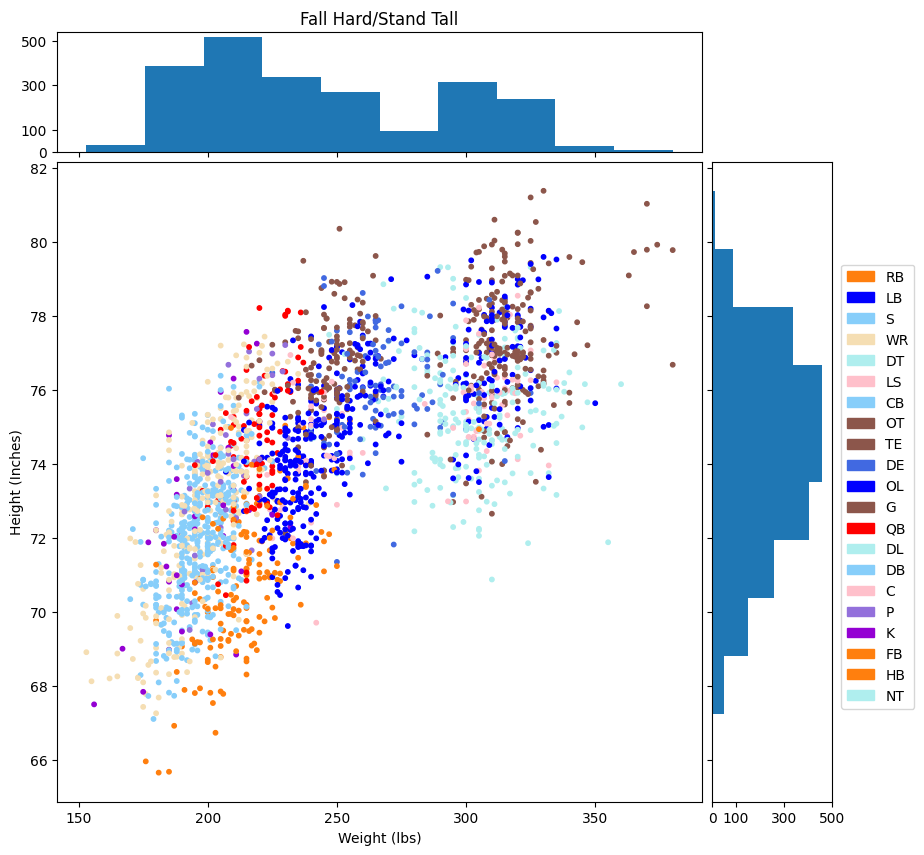

<Figure size 1000x600 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

plt.figure(figsize=(10, 6))
ax.axvline(x=180, ymin=74, ymax= 82, linestyle ='-')
ax.axhline(y=74, xmin=180, xmax=400)
ax.scatter(x, y, c = df.color, s = 10)
ax.set_ylabel("Height (Inches)")
ax.set_xlabel("Weight (lbs)")




divider = make_axes_locatable(ax)

ax_histx = divider.append_axes("top", 1.2, pad=0.1, sharex=ax, title = "Fall Hard/Stand Tall")
ax_histy = divider.append_axes("right", 1.2, pad=0.1, sharey=ax)


ax_histx.xaxis.set_tick_params(labelbottom=False)
ax_histy.yaxis.set_tick_params(labelleft=False)

ax_histx.hist(x)
ax_histy.hist(y, orientation='horizontal')

ax_histx.set_yticks([0, 100, 300, 500])
ax_histy.set_xticks([0, 100, 300, 500])

ax.legend( handles = lst,bbox_to_anchor=(1.34, .85))

plt.show()